# Motivation

In statistics, we often have to deal with optimization problems where we need to find solution(s) that maximize or minimize an function. 

$x_{max} = \underset{x}{\mathrm{arg\,max}}f(x) = \{x|f(x) = \underset{x'}{\mathrm{arg\,max}}f(x')\}\quad \text{or}\quad x_{min} = \underset{x}{\mathrm{arg\,min}}f(x) = \{x|f(x) = \underset{x'}{\mathrm{arg\,min}}f(x')\}$

The function we want to maximize (or minimize) sometimes are also called target or objective function. The solution that maximize (or minimize) are called maximizer (or minimizer). Without loss of generality, in this note, we will just focus on maximization problem.

Typically, maximization of $f(x)$ is done by solving
$$f'(x) = 0$$


## Example: Maximum Likelihood Estimator (mle)

Suppose you have observed data points $y_1, y_2, \dots, y_n$ that are independent and from the same distribution with probability density function $f(y; \theta)$, where $\theta$ is called parameter.

For example, for Normal distribution $N(\theta, 1)$, the density function is

$$f(y_i;\theta) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(y_i-\theta)^2}{2}}.$$

When we have observed data $y_1, y_2, \dots, y_n$ from a distribution, the function now depends only on the unknow parameter $\theta$.  This function can be thought as a function that tell us how likely we observe the data $y_1, y_2, \dots, y_n$ given each parameter value $\theta$. So, it is also called the likelihood function:

$$L(\theta) = \prod_{i=1}^n f(y_i; \theta).$$

So, to estimate the unknow parameter $\theta$, it is intuitive to use the value of $\theta$ that maximize the likelihood function. Maximizing $L(\theta)$ is equivalent to maximizing $\log L(\theta)$, such that

$$\log L(\theta) = l(\theta) = \log \left(\prod_{i=1}^n f(y_i; \theta)\right) = \sum_{i=1}^n \log f(y_i; \theta)$$

To solve this problem, all we need to do is to solve the following problem

$$l'(\theta) = 0, \quad \text{where } l'(\theta) = \frac{d}{d\theta}l(\theta).$$

The solution (root) to the above equation, denoted as $\hat \theta$, is called the maximum likelihood estimator.

# Root Finding Problem

The root or zero of a function, $f(x)$, is an $x_0$ such that $𝑓\,(𝑥_0)=0$

For simple function, it is easy to find the solution. For example, 

$$f(x) = 5x + 6.$$

For quadratic function, for example

$$f(x) = 5x^2 + 8x + 1,$$

we have the well-known result that states the roots are

$$\frac{-8 \pm \sqrt{64-4*5*1}}{2*5}.$$

However, for other function such as $f(𝑥)= \cos(x)−x$, determining an analytic, or exact, solution for the roots of functions can be difficult. For these cases, it is useful to generate numerical approximations of the roots of f – this is where root-finding algorithms come in.

# General Structure

1. start with an initial guess
2. calculate the result of the guess
3. update the guess based on the result and some further conditions
4. repeat until you’re satisfied with the result (stopping rules).

# Tolerance

> **Error** is a deviation from an expected or computed value. **Tolerance** is the level of error that is acceptable for an application. We say that a computer program has **converged** to a solution when it has found a solution with an error smaller than the tolerance.

For root finding problems, there are different choices for the measure of error, some examples are:

1. Since we want $x^*$, such that $f\,(x^*)$ is very close to 0. Therefore $|f\,(x^*)|$ is a possible choice for the measure of error since the smaller it is, the likelier we are to a root.

$$\text{Stopping rule: }\text{stop if } |f\,(x^*)|<\epsilon, \text{ where } \epsilon \text{ is pre-specified tolerance.}$$


2. Also if we assume that $x^{(i)}$ is the $i$-th guess of an algorithm for finding a root, then $|x^{(i+1)}-x^{(i)}|$ is another possible choice for measuring error, since we expect the improvements between subsequent guesses to diminish as it approaches a solution

$$\text{Stopping rule: }\text{stop if } |x^{(i+1)}-x^{(i)}|<\epsilon, \text{ where } \epsilon \text{ is pre-specified tolerance.}$$


3. 

$$\text{Stopping rule: }\text{stop if } \frac{|x^{(i+1)}-x^{(i)}|}{|x^{(i)}|}<\epsilon, \text{ where } \epsilon \text{ is pre-specified tolerance.}$$


# Root Finding Algorithm

Say we would like to maximize function 

$$f(x) = \sin(x) - \frac{x^2}{2}+6x.$$



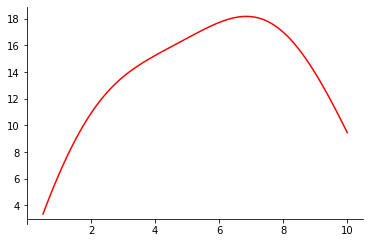

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0.5,10,100)

# the function, which is y = log(x)/(1+x) here
y = np.sin(x)-x**2/2 + 6*x

# setting the axes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(("data", 3))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

Or finding the root of the derivative of $f(x)$,

$$f'(x) = \cos(x) - x + 6$$

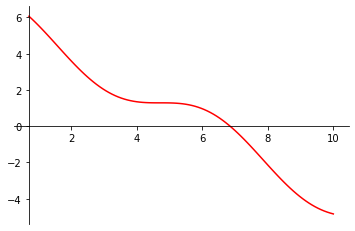

In [3]:
# 100 linearly spaced numbers
x = np.linspace(0.7,10,100)

# the function, which is y = log(x)/(1+x) here
y = np.cos(x)-x+6

# setting the axes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(("data", 0.7))
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

## Bisection Method

> The **Intermediate Value Theorem** states that if $f$ is a continuous function whose domain contains the interval $[a, b]$. If N is a number between $f(a)$ and $f(b)$, then, there exist $c\in[a,b]$ such that $f(c)=N$.

From this, we have the fact that 
> If a continuous function has values of opposite sign inside an interval, then it has a root in that interval (**Bolzano's Theorem**).

You Bisection function takes args: f, a, b, epsilon = 10**(-5), max_iter=100

initialize counter = 0

**repeat** the following for max_iter iterations:

   1. Calculate the mid-point between a and b, denote as m. 
   2. Plug m into the function f to see if m satisfy the tolerance:

       - if yes, **return** m as the approximated root.


   3. if f(a)f(m) < 0:
           b = m
       else:
           a = m
           
   4. update counter

## Or 

You Bisection function takes args: f, a, b, epsilon = 10**(-5), max_iter=100

start with initial guess: m = (a+b)/2

initialize counter = 0

**repeat** the following until converge or reach max_iter iterations:

  1. if f(a)f(m) < 0:
         b = m
     else:
         a = m
  2. Calculate the new mid-point between a and b, and update m. 
  
  3. Update counter
 

Here, we will use $|f\,(m)|<\epsilon$ as the stopping rule.

You're likely to make mistakes in your first attempt at any algorithm. To help you find and fix errors, add some diagnostic printing to your function that prints out a, b f(m), and at each iteration. Add an optional argument **diagnostics** to the function that turns the printing on and off. Make diagnostics default to **False**

In [ ]:
def bisection1(f, a, b, eps = 10**(-5), max_iter = 100):
    counter = 0
    while counter < max_iter:
        m = (a+b)/2
        fm = f(m)
        if abs(fm) <= eps:
            return m
        if f(a)*fm < 0:
            b = m
        else:
            a = m
        counter += 1
    print("Fail to converge")

In [ ]:
def bisection2(f, a, b, eps = 10**(-5), max_iter = 100):
    for i in range(max_iter):
        m = (a+b)/2
        fm = f(m)
        if abs(fm) <= eps:
            return m
        if f(a)*fm < 0:
            b = m
        else:
            a = m
    print("Fail to converge")

In [ ]:
def bisection3(f, a, b, eps):
    m = (a+b)/2
    if abs(f(m)) <= eps:
        return m
    if f(a)*f(m) < 0:
        return (bisection(f, a, m, eps))
    else:
        return (bisection(f, m, b, eps))

## Newton methods

Let $f(x)$ be a continuous and differentiable function and $x_0$ be an root such that $f(x_0) = 0$. 

Starting with an initial guess, the Newton method is an iterative root finding approach which uses information about the current guess of the root $x^{(i)}$ and derivative of the function to produce subsequently better approximations of the root $x^{(i+1)}$.

Given current guess $x^{(i)}$, using Taylor expansion to take the linear approximation of $f(x)$ around $x^{(i)}$, such that

$$f(x) \approx f(x^{(i)}) + f'(x^{(i)})(x-x^{(i)}),$$

where $f'(x) = \frac{d}{dx}f(x)$ is the derivative of $f$. Then, setting this approximation equal to 0, we can obtain the value of the next guess $x^{(t+1)}$, such that

$$x^{(i+1)} = x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$$

You newton function takes args: f, f_prime, init, epsilon = 10**(-5), max_iter=100

x_old = init

**repeat** the following for max_iter iterations.


   1. x_new = x_old - f(x_old)/f'(x_old)
   2. Calculate error and compare with tolerance
      - if converge, **return** x_new
   3. x_old = x_new


In [ ]:
def newton(f, f_prime, init, epsilon = 10**(-5), max_iter=100):
    x_old = init
    counter = 0
    while counter < max_iter:
        try:
            x_new = x_old - f(x_old)/f_prime(x_old)
        except ZeroDivisionError:
            print("f_prime eveluate to 0 during iteration")
            return None
        if (abs(x_new-x_old)<epilon):
            return x_new
        x_old = x_new
        counter += 1
    print("Fail to get converged result")

**Remark** 

* Make sure to update x_old so the next iteration will use the most recent guess.

* Here, we will use $|x^{(i+1)}-x^{(i)}|<\epsilon$ as the stopping rule.

## Fixed point method

> A fixed point of a function is a point whose evaluation by that function equals to itself, i.e., $x = G(x)$.

The natural way to hunt for the fixed point is to use the iterative method such that

$$x^{(i+1)} = G(x^{(i)})$$

## Root finding using fixed point iteration

For solving f(x) = 0, we can simply let $G(x) = x + \alpha f(x)$, where $\alpha\ne0$ is a constant.

So, the next update is 

$$x^{(i+1)} = G(x^{(i)}) = x^{(i)} + \alpha f(x^{(i)})$$

According to the above, we can see Newton method is a special case of the fixed point method when $\alpha = -1/f(x^{(i)})$

You fix_point function takes args: f, init, alpha, epsilon = 10**(-5), max_iter=100

x_old = init

**repeat** the following for max_iter iterations.

   1. x_new = x_old + alpha*f(x_old)
   2. Calculate error and compare with tolerance
      - if converge, **return** x_new
   3. x_old = x_new
